<a href="https://colab.research.google.com/github/TMikeM/PRUEBAS-PARA-EL-PROYECTO-FINAL/blob/main/grafoProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
                         IN TIME - UIS
---------------- NOMENCLATURA DE LOS EDIFICIOS: -------------------------|
- EN: Entrada de la 27         | - FINGF: Facultad de Fisicomecanicas
- CH: Ciencias Humanas         | - DI: Diseño industrial
- IM: Ingenieria Mecanica      | - CEIM:              
- CT: Camilo Torres            | - CAYFAV: CapriuisyFavuis
- CEN: Centic                  | - LABAT: Laboratorio de alta tension
- FDC : Facultad de Ciencias   | - LABDI: Laboratorio de diseli undustrial
- IE: Ingenieria Electrica     | - LABHI: Laboratorio de Hidraulica
- II: Ingenieria Industrial    | - PDA: Planta de Aceros
- IL: Instituto de Lenguas     | - JBV: Jorge Bautista V
- IQ: Ingenieria Quimica       | - DACA: Daniel Casas
- AMM: Aula Maxima de Mecanica | - AMF: Aula Maxima de Fisica
- E3T: Electrica Electronica y Telecomunicaciones 

El programa presenta dos servicios:
>>> Consulta de una ruta en específico fuera del horario
>>> Consulta de rutas según el horario

'''

# ❗ Importar librerías y archivos para el funcionamiento del programa

In [206]:
#Nuestras librerías
import networkx as nx #Para los grafos
import pandas as pd #Para leer los archivos de excel
import matplotlib.pyplot as plt #Para las gráficas

## 🏢 Para la red de edificios e intersecciones

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [207]:
#Convirtiendo el archivo excel a data Frame
df = pd.read_excel("grafo.xlsx", index_col=None)

In [208]:
df.head()

,Origen,Destino,Peso
0,EN,I0,180
1,IL,I0,85
2,IL,I1,121
3,AMM,I1,17
4,IM,I1,25


In [209]:
#Esto es para construir nuestro grafo, que se llama G
G = nx.from_pandas_edgelist(df,source='Origen',target='Destino',edge_attr='Peso')

## ⏱ Para los horarios

In [ ]:
#Esto nos ayuda a cargar el archivo de excel para convertir a csv
from google.colab import files
files.upload()

In [210]:
#Convirtiendo el archivo excel a data Frame
dh = pd.read_excel("Horarios2.xlsx", index_col=None)

In [211]:
dh.tail()

,INLUN,OUTLUN,INMAR,OUTMAR,INMIE,OUTMIE,INJUE,OUTJUE,INVIE,OUTVIE,INSAB,OUTSAB
0,EN,CT,EN,II,EN,CEN,II,CT,FINGF,CT,Nan,Nan
1,CT,CEN,II,FINGF,CEN,IL,CT,EN,CT,IL,Nan,Nan
2,CEN,IL,FINGF,CT,IL,EN,Nan,Nan,IL,EN,Nan,Nan
3,IL,EN,CT,EN,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan


# ✨ Gráficas


## ⭐ Gráfica general del mapa de la UIS.

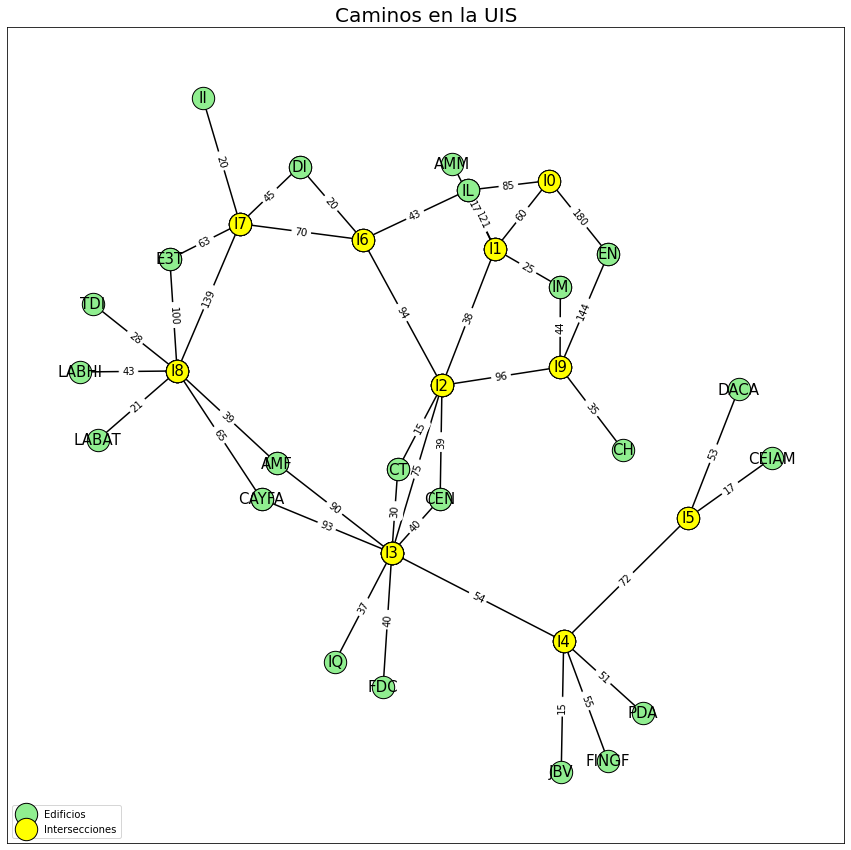

In [234]:
#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#CCONFIGURACION DE LOS NODOS
edif = list(df.Origen)   #Toma del dataframe solo la columna de origen
inter = list(df.Destino) #Toma del dataframe solo la columna de destino

#Para los edificios:
nx.draw_networkx_nodes(G, pos, 
                       nodelist=edif, node_size=500, 
                       edgecolors='Black', node_color='lightgreen', label = 'Edificios' ) 
#Para las intersecciones:
nx.draw_networkx_nodes(G, pos, 
                       nodelist=inter, node_size=500, 
                       edgecolors='Black', node_color='yellow', label = 'Intersecciones')

#CONFIGURACIONES PARA LAS ARISTAS
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1.5)
labels = {e: G.edges[e]['Peso'] for e in G.edges} #Guarda los pesos entre cada arista
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

#Configuración de las etiquetas
nx.draw_networkx_labels(G, pos, font_size=15)
plt.legend(loc="lower left")
plt.title("Caminos en la UIS", fontsize=20)
plt.axis('on')
plt.show()

## ⭐ Consulta de una ruta especifica
Permite al usuario consultar una ruta externa a su horario.

Escribe las inciales de los edificos en ***Mayuscula***
Ingresa las iniciales del edificio de Inicio: EN
Ingresa las iniciales del edificio de Destino: LABAT


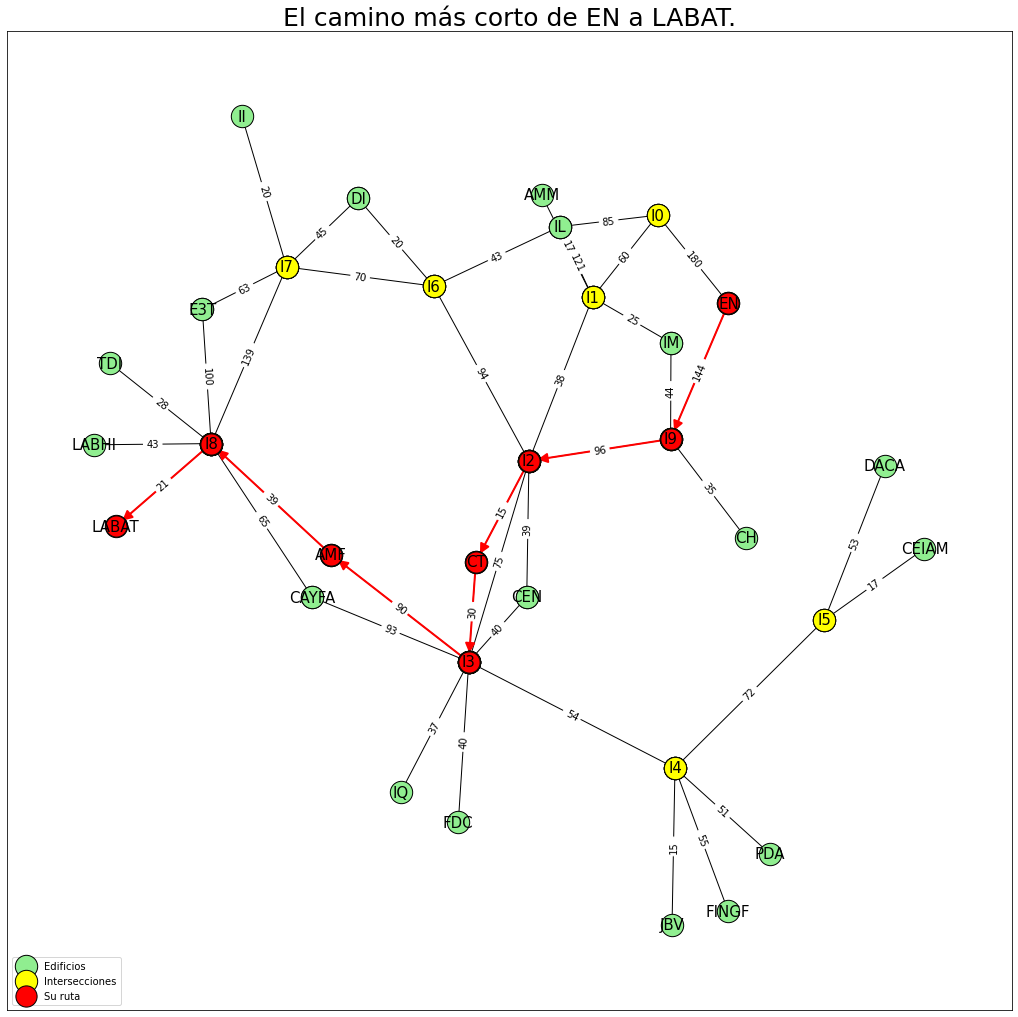

Usted recorrera en total: 8 puntos.
La distancia en metros es 435


In [224]:
print("Escribe las inciales de los edificos en ***Mayuscula***")
Entrada= input("Ingresa las iniciales del edificio de Inicio: ")
Salida= input("Ingresa las iniciales del edificio de Destino: ")

#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(18, 18)) 

#Distancia de los nodos
seed = 2
pos = nx.spring_layout(G, seed=seed)

#CONFIGURACIÓN PARA LOS NODOS
inter = list(df.Destino)
edif = list(df.Origen)

#Para los edificios:
nx.draw_networkx_nodes(G, pos, 
                       nodelist=edif, node_size=500, 
                       edgecolors = 'black', node_color='lightgreen', 
                       label='Edificios')
#Para las intersecciones:
nx.draw_networkx_nodes(G, pos, 
                       nodelist=inter, node_size=500, 
                       edgecolors = 'black', node_color='yellow', 
                       label='Intersecciones') 

#CONFIGURACIÓN PARA LAS ARISTAS
labels = {e: G.edges[e]['Peso'] for e in G.edges} #Guarda los pesos entre cada arista
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_edges(G, pos, edge_color='black', width = 1)

#CCONFIGURACIÓN PARA COLOREAR EL CAMINO MÁS CORTO (path)
path = nx.shortest_path(G, source=Entrada, target=Salida, weight='Peso', method='dijkstra')
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G, pos,
                       nodelist=path, node_size=450, 
                       edgecolors='black', node_color='red', label = 'Su ruta')
nx.draw_networkx_edges(G, pos, 
                       arrows = True, arrowstyle="-|>", arrowsize=20, 
                       edgelist=path_edges,  edge_color='red', width=2)

#CONFIGURACIÓN PARA LAS ETIQUETAS DE LA GRÁFICA
nx.draw_networkx_labels(G, pos, font_size=15)

plt.legend(loc="lower left")
plt.title(f"El camino más corto de {Entrada} a {Salida}.", fontsize=25)
plt.axis('on')
plt.savefig('Mapa_UIS.png', dpi = 300, format = 'png', transparent = True)
plt.show()

#Aquí le indicamos al usuario la cantidad total de intersecciones a recorrer y la distancia total en metros.
print(f"Usted recorrera en total: {len(path)} puntos.\nLa distancia en metros es {nx.shortest_path_length(G, Entrada, Salida, 'Peso')}")

## ⭐ Consulta de rutas de la semana según el horario


In [225]:
#Lectura del horario - LUNES
l_ent = list (dh.INLUN)
l_sal = list (dh.OUTLUN)

#Lectura del horario - Martes
m_ent = list (dh.INMAR)
m_sal = list (dh.OUTMAR)

#Lectura del horario - Miércoles
mm_ent = list (dh.INMIE)
mm_sal = list (dh.OUTMIE)

#Lectura del horario - Jueves
j_ent = list (dh.INJUE)
j_sal = list (dh.OUTJUE)

#Lectura del horario - Viernes
v_ent = list (dh.INVIE)
v_sal = list (dh.OUTVIE)

#Lectura del horario - Sábado
s_ent = list (dh.INSAB)
s_sal = list (dh.OUTSAB)

In [226]:
#Función para guardar caminos
def RutasHorario (inicio, final):
  #Distancia de los nodos
  seed = 2
  pos = nx.spring_layout(G, seed=seed)

  #Lista con colores para los diferentes caminos
  ColorPath = ['red', 'yellow', 'purple', 'green', 'blue', 'pink', 'brown', 'black', 'lightgreen']

  cont_rutas = 1 
  j=0
  cp = 0
  for i in inicio:
    s  = final[j]
    c = ColorPath[cp]
    if i=='Nan' and s == 'Nan':
      continue
    else:
      camino = nx.shortest_path(G,source=i,target=s, weight='Peso', method='dijkstra')
      cam_edges = list(zip(camino,camino[1:]))
      nx.draw_networkx_nodes(G,pos, nodelist=camino, node_size=450, node_color=c, label=(f'Su ruta # {cont_rutas}'))
      nx.draw_networkx_edges(G, pos, arrows = True, arrowstyle="-|>", arrowsize=20, edgelist=cam_edges,  edge_color=c, width=2)
      node_labels = dict(zip(camino, camino)) #Para que aparezca solo los nombres de los nodos que necesito
      plt.legend()
      nx.draw_networkx_labels(G, pos, font_size=15, labels=node_labels)
      cp = cp+1
      j = j+1
      cont_rutas = cont_rutas + 1


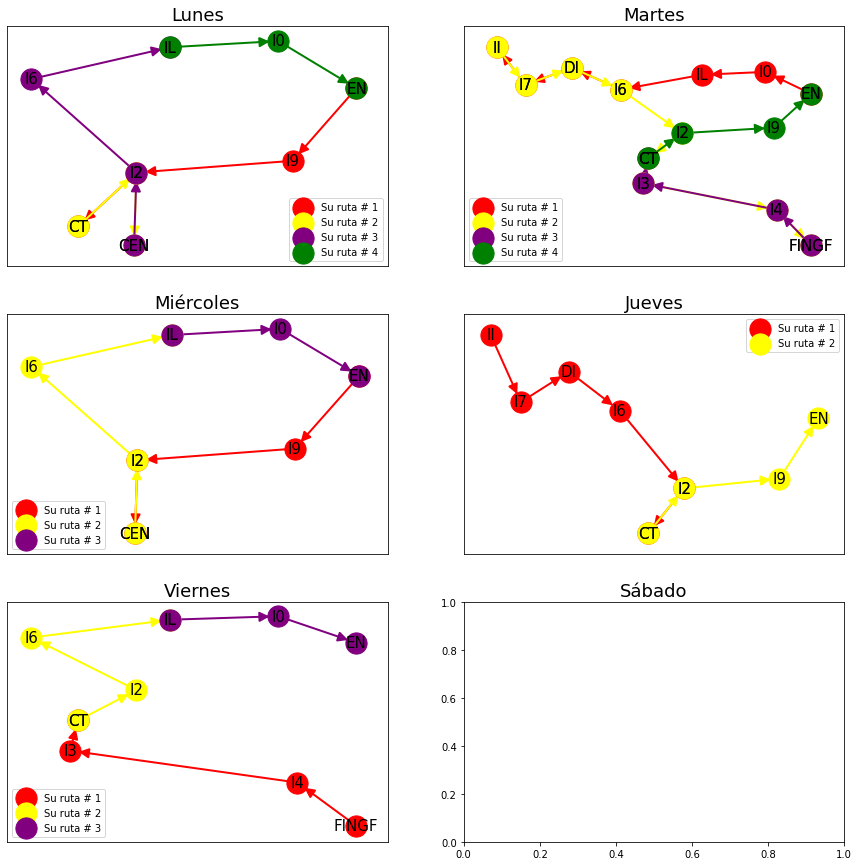

In [231]:
#GRAFICO DE TODAS LAS RUTAS POR DÍA
#Tamaño de la gráfica
fig, ax = plt.subplots(figsize=(15, 15)) 

#Subplot Lunes
plt.subplot(3, 2, 1)
RutasHorario(l_ent, l_sal)
plt.title('Lunes', fontsize=18)

plt.subplot(3, 2, 2)
RutasHorario(m_ent, m_sal)
plt.title('Martes', fontsize=18)

plt.subplot(3, 2, 3)
RutasHorario(mm_ent, mm_sal)
plt.title('Miércoles', fontsize=18)

plt.subplot(3, 2, 4)
RutasHorario(j_ent, j_sal)
plt.title('Jueves', fontsize=18)

plt.subplot(3, 2, 5)
RutasHorario(v_ent, v_sal)
plt.title('Viernes', fontsize=18)

plt.subplot(3, 2, 6)
RutasHorario(s_ent, s_sal)
plt.title('Sábado', fontsize=18)

plt.axis('on')
plt.savefig('Mapa_UIS.png', dpi = 300, format = 'png', transparent = True)
plt.show()

# Espacio de pruebas

In [ ]:
#Aquí buscamos otras funciones para verificar que el camino corto es el mismo para diferentes funciones
djk_path= nx.dijkstra_path(G, source= 'EN', target= 'LABAT', weight='Peso') #Algoritmo especial de dijkstra
print(f"Camino con nx.dijkstra_path: {djk_path}")
pathD = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso')#Otro algoritmo, sin el metodo especifico
print(f"Camino con nx.shortest_path sin method: {pathD}")
pathE = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso', method='dijkstra')#Algoritmo anterior, con metodo especifico en dijkstra
print(f"Camino con nx.shortest_path con method: {pathE}")
pathE = nx.shortest_path(G,source='EN',target='LABAT', weight='Peso', method='bellman-ford')#Algoritmo anterior, con metodo especifico en BellmanFord
print(f"Camino con nx.shortest_path con otro algoritmo: {pathE}")


In [ ]:
#Este archivo nos  ayuda a exportar el grafo graficado 
#mas arriba a un archivo modificable en ghepi y asi realizar mas "Bonito el grafo"
nx.write_gexf(G,'grafo.gexf',version='1.2draft')